In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv("temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


as per our data info we have float and object data type.

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
import warnings
warnings.filterwarnings("ignore")
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

In [11]:
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

In [12]:
df.drop(columns = ['lat' , 'lon'], inplace = True)

In [15]:
# cleared all the null values. in the form of station and date.
for col in df.columns:
    if col not in ['station' , 'Date']:
        df[col] = df[col].replace(np.nan, df[col].median())

In [16]:
# check null values again.
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [17]:
df['Date'] = pd.to_datetime(df['Date']) 

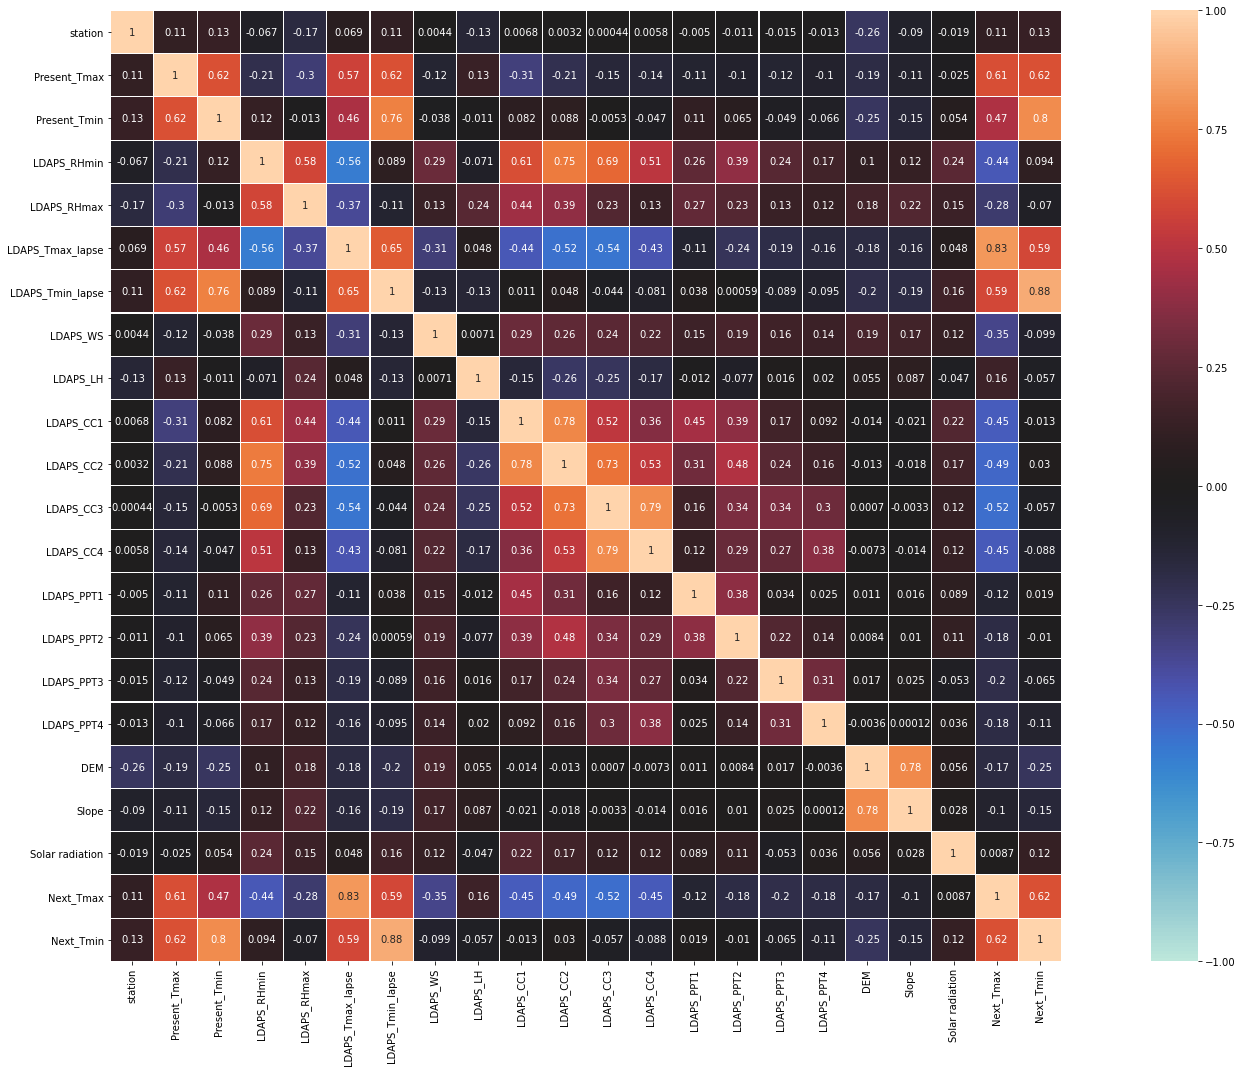

In [19]:
# here we are checking correlation with our data and do visualization.
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin = -1, vmax=1, annot=True, square = True, center=0,fmt='.2g', linewidths = 0.1)
plt.tight_layout()

In [20]:
#check our skewness of our dataset
df.skew()

station             0.000182
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

# check outliers

In [28]:
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.reset_index(inplace = True)
df

In [34]:
# we are converting our date column from object to int.
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df['Date'] = enc.fit_transform(df['Date'].values.reshape(-1,1))
df

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,1.0,11.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,1,2.0,11.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,2,3.0,11.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,3,4.0,11.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,...,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,4,5.0,11.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,...,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6914,7745,21.0,290.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,...,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7
6915,7746,22.0,290.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,...,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1
6916,7747,23.0,290.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,...,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1
6917,7748,24.0,290.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,...,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8


In [31]:
x = df.drop(['Next_Tmax','Next_Tmin'], axis=1)
y = df[['Next_Tmax','Next_Tmin']]

In [32]:
# our x and y value in the form of seperately.
x

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation
0,0,1.0,11.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,...,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996
1,1,2.0,11.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,...,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500
2,2,3.0,11.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,...,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664
3,3,4.0,11.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,...,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844
4,4,5.0,11.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,...,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6914,7745,21.0,290.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,...,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414
6915,7746,22.0,290.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,...,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711
6916,7747,23.0,290.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,...,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965
6917,7748,24.0,290.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,...,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535


In [33]:
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
6914,27.6,17.7
6915,28.0,17.1
6916,28.3,18.1
6917,28.6,18.8


In [37]:
for index in x.skew().index:
    if x.skew().loc[index] > 0.5:
        x[index] = np.cbrt(x[index])
        if x.skew().loc[index] <-0.5 :
            x[index] = np.square(x[index])

In [38]:
x.skew()

index               0.006127
station             0.006202
Date                0.010347
Present_Tmax       -0.276610
Present_Tmin       -0.226822
LDAPS_RHmin         0.312205
LDAPS_RHmax        -0.694587
LDAPS_Tmax_lapse   -0.112274
LDAPS_Tmin_lapse   -0.389287
LDAPS_WS            0.467615
LDAPS_LH           -0.240883
LDAPS_CC1          -0.661773
LDAPS_CC2           0.037124
LDAPS_CC3           0.230988
LDAPS_CC4          -0.417047
LDAPS_PPT1          1.935273
LDAPS_PPT2          2.356777
LDAPS_PPT3          2.524149
LDAPS_PPT4          2.874264
DEM                 0.934309
Slope               0.622381
Solar radiation    -0.507802
dtype: float64

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.75766209, -1.67069073, -1.59544243, ...,  2.36772762,
         1.29575561,  1.55057999],
       [-1.75720774, -1.53172426, -1.59544243, ..., -0.13379116,
        -0.41241341,  1.25638057],
       [-1.75675339, -1.39275779, -1.59544243, ..., -0.47887022,
        -0.85757756,  1.24267601],
       ...,
       [ 1.76219503,  1.38657168,  1.65289579, ..., -1.22400783,
        -1.15523854, -2.13831177],
       [ 1.76264938,  1.52553815,  1.65289579, ..., -1.13276551,
        -0.96309879, -2.15007282],
       [ 1.76310373,  1.66450462,  1.65289579, ..., -1.01947382,
        -0.84584085, -2.1191928 ]])

In [55]:
from sklearn.linear_model import LinearRegression
max_r_score = 0
r_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state= r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr = r2_score(y_test, y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is" , max_r_score, "on random State" , r_state)

max r2 score is 0.7842089761573066 on random State 1


In [56]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [ ]:
model_1 = ExtraTreesRegressor(max_depth = 20, n_estimators = 500, min_samples_split = 2)
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_train)
pred = model_1.predict(x_test)

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR

In [67]:
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print('dtc score:',dtc.score(x_train,y_train))

dtcpredict = dtc.predict(x_test)
print('dtc r2_score:', r2_score(y_test,dtcpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,dtcpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,dtcpredict)))

dtc score: 1.0
dtc r2_score: 0.750180480030417
Mean squared error of dtc = 1.7671849710982683
Root Mean squared error of dtc = 1.3293550959387292


In [68]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print('dtc score:',knr.score(x_train,y_train))

knrpredict = knr.predict(x_test)
print('dtc r2_score:', r2_score(y_test,knrpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,knrpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,knrpredict)))

dtc score: 0.9165872482848199
dtc r2_score: 0.8678691078044787
Mean squared error of dtc = 0.910884971098269
Root Mean squared error of dtc = 0.9544029395901236


In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
#RandomForestClassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(predrf)

print('Rf score:',rf.score(x_train,y_train))

print('rf r2_score:', r2_score(y_test,predrf))

[[31.434 23.551]
 [25.745 21.222]
 [24.465 19.642]
 ...
 [29.404 22.079]
 [25.099 19.67 ]
 [32.594 27.811]]
Rf score: 0.9847579747700665
rf r2_score: 0.8858291002896811


# Model Saving:

In [77]:
# Saving our data.
import pickle
filename = 'temperature'
pickle.dump(reg, open(filename, 'wb'))


# Conclusion:

In [78]:
import numpy as np
a=np.array(y_test)
a

array([[32.1, 24.3],
       [25.3, 21.1],
       [27.1, 19.5],
       ...,
       [29.7, 22. ],
       [25.3, 19.6],
       [32.6, 28.3]])

In [80]:
predicteed=np.array(reg.predict(x_test))
predicteed

array([[31.82826586, 23.17079164],
       [28.48705191, 23.69147606],
       [25.56504108, 19.53152425],
       ...,
       [28.9100013 , 21.10686781],
       [25.88469234, 20.46637518],
       [32.14394366, 27.39551809]])

In [82]:
y_pred

array([[31.5, 21.7],
       [26.8, 22.8],
       [33.5, 26.6],
       ...,
       [30.6, 23.8],
       [23.2, 20.5],
       [33.8, 24.1]])

In [84]:
y  # Original Target Value

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
6914,27.6,17.7
6915,28.0,17.1
6916,28.3,18.1
6917,28.6,18.8


In [85]:
pd.DataFrame(y_pred)    ## Predicted Target Value

,0,1
0,31.5,21.7
1,26.8,22.8
2,33.5,26.6
3,31.1,22.0
4,29.8,19.5
...,...,...
5184,33.7,25.7
5185,31.0,27.1
5186,30.6,23.8
5187,23.2,20.5
